In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv('Bhaktapur_Dataset.csv')
# df=df.head(20)

In [18]:
df.describe()  
df.shape

(14242, 22)

In [19]:
df

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/3/1981,Bhaktapur,27.7,85.5,0.00,77.96,4.25,61.59,4.82,-2.67,...,8.72,2.38,1.69,4.11,0.37,3.75,1.66,3.43,0.50,2.93
1,1/4/1981,Bhaktapur,27.7,85.5,0.04,77.85,4.28,68.04,3.49,-2.61,...,8.83,1.94,1.78,4.19,0.28,3.92,1.78,3.49,0.35,3.14
2,1/5/1981,Bhaktapur,27.7,85.5,0.22,77.85,4.10,66.77,3.15,-3.13,...,8.32,1.50,1.75,4.29,0.56,3.73,1.79,3.80,0.72,3.08
3,1/6/1981,Bhaktapur,27.7,85.5,0.24,77.75,3.98,66.00,2.87,-3.82,...,9.50,1.47,1.98,4.86,0.48,4.38,2.02,4.40,0.46,3.94
4,1/7/1981,Bhaktapur,27.7,85.5,0.90,77.72,4.40,87.07,0.39,-2.48,...,5.47,-0.04,1.58,3.49,0.25,3.23,1.71,3.19,0.40,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,12/27/2019,Bhaktapur,27.7,85.5,0.00,77.84,2.60,51.53,0.41,-9.66,...,11.19,-2.34,1.86,3.02,0.67,2.35,1.97,3.20,0.85,2.34
14238,12/28/2019,Bhaktapur,27.7,85.5,0.00,78.13,2.56,47.09,1.51,-9.09,...,14.83,-1.18,2.52,4.40,0.83,3.56,2.60,4.62,0.98,3.64
14239,12/29/2019,Bhaktapur,27.7,85.5,0.00,78.22,2.74,41.24,4.37,-8.15,...,9.28,-0.52,1.71,3.49,0.62,2.87,1.69,2.78,0.76,2.02
14240,12/30/2019,Bhaktapur,27.7,85.5,0.00,78.30,2.78,42.66,4.08,-8.05,...,9.72,-0.41,1.69,3.41,0.47,2.95,1.62,2.73,0.45,2.28


In [20]:
X = df.drop(columns=['DATE', 'DISTRICT', 'LAT', 'LON','PRECTOT', 'PS', 'QV2M', 'WS10M', 'T2M'])
X

,RH2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,61.59,-2.67,10.50,1.78,8.72,2.38,4.11,0.37,3.75,1.66,3.43,0.50,2.93
1,68.04,-2.61,9.02,0.19,8.83,1.94,4.19,0.28,3.92,1.78,3.49,0.35,3.14
2,66.77,-3.13,8.37,0.05,8.32,1.50,4.29,0.56,3.73,1.79,3.80,0.72,3.08
3,66.00,-3.82,8.78,-0.72,9.50,1.47,4.86,0.48,4.38,2.02,4.40,0.46,3.94
4,87.07,-2.48,3.59,-1.88,5.47,-0.04,3.49,0.25,3.23,1.71,3.19,0.40,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,51.53,-9.66,7.39,-3.80,11.19,-2.34,3.02,0.67,2.35,1.97,3.20,0.85,2.34
14238,47.09,-9.09,9.69,-5.14,14.83,-1.18,4.40,0.83,3.56,2.60,4.62,0.98,3.64
14239,41.24,-8.15,10.39,1.10,9.28,-0.52,3.49,0.62,2.87,1.69,2.78,0.76,2.02
14240,42.66,-8.05,10.24,0.51,9.72,-0.41,3.41,0.47,2.95,1.62,2.73,0.45,2.28


In [21]:
selected_columns = ['PRECTOT', 'PS', 'QV2M', 'WS10M', 'T2M']
y = df[selected_columns]
y
y.describe()

,PRECTOT,PS,QV2M,WS10M,T2M
count,14242.00000,14242.000000,14242.000000,14242.000000,14242.00000
mean,2.05008,77.974535,7.766868,2.225029,12.86055
std,4.57245,0.277005,4.618868,0.488554,5.13351
min,0.00000,76.930000,0.830000,0.570000,-1.42000
25%,0.00000,77.770000,3.560000,1.840000,8.42250
50%,0.06000,77.990000,6.310000,2.170000,14.08000
75%,1.87750,78.180000,12.790000,2.580000,17.44000
max,81.86000,78.880000,16.690000,5.080000,22.17000


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)

y_test=y_test.to_numpy()
y_test

array([[ 0.  , 77.91,  3.55,  2.84, 15.57],
       [ 0.  , 77.89,  3.56,  2.66, 15.88],
       [ 0.  , 78.03,  3.98,  2.61, 15.73],
       ...,
       [ 0.  , 78.22,  2.74,  1.71,  4.37],
       [ 0.  , 78.3 ,  2.78,  1.69,  4.08],
       [ 0.  , 78.41,  2.61,  1.62,  3.91]])

In [32]:
lr= LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
c = lr.intercept_
c

array([-4.93659368e+00,  7.82433020e+01, -1.87095650e+00,  3.08415856e-02,
       -1.34590151e-01])

In [35]:
m = lr.coef_
m

array([[ 1.40037488e-01, -4.43826010e-01, -9.30382736e+00,
         9.36194163e+00,  8.76095895e+00,  3.02574496e-01,
        -6.54530086e+00,  5.23825307e+00,  6.00234549e+00,
         1.67397613e+00,  1.27646935e+01, -1.22856405e+01,
        -1.26543531e+01],
       [-6.91269924e-04, -4.36802204e-04, -2.40316656e-01,
         2.85290385e-01,  2.94440849e-01, -4.51525234e-02,
         4.44282105e-01, -5.28341957e-01, -5.35693363e-01,
        -8.36549768e-02,  4.95958443e-02, -5.30780007e-02,
        -4.05574442e-02],
       [ 9.01716661e-02,  1.46252261e-01,  8.74644856e-01,
        -5.09751698e-01, -8.55040458e-01, -8.68232483e-02,
        -1.71848867e+00,  2.22778924e+00,  2.27699467e+00,
         3.48845682e-01,  8.36428770e-01, -1.09711564e+00,
        -1.28283808e+00],
       [-1.51266322e-03,  5.76140599e-03,  1.68990303e-01,
        -1.80417210e-01, -1.69308253e-01,  1.29834908e-02,
         2.84206939e-01,  1.48541960e-01,  3.31398170e-02,
         8.13201287e-01,  4.04605006e

In [36]:
y_pred = lr.predict(X_test)
y_pred

array([[-1.37389158e-01,  7.79851604e+01,  3.75345674e+00,
         2.82448040e+00,  1.53569672e+01],
       [-5.03006839e-02,  7.80302867e+01,  4.06393700e+00,
         2.66323816e+00,  1.58560684e+01],
       [-8.62045717e-01,  7.80064840e+01,  4.18560863e+00,
         2.62269236e+00,  1.51847752e+01],
       ...,
       [ 2.78800256e-01,  7.83509406e+01,  2.70133186e+00,
         1.62242566e+00,  4.08129114e+00],
       [ 1.74482063e-01,  7.83523672e+01,  2.55358686e+00,
         1.58254986e+00,  3.87101883e+00],
       [ 8.08203703e-01,  7.83277602e+01,  2.21335937e+00,
         1.52131146e+00,  3.52133928e+00]])

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for each target variable
rmse_per_column = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Display RMSE for each target variable
for i, column in enumerate(selected_columns):
    print(f'RMSE for {column}: {rmse_per_column[i]}')


RMSE for PRECTOT: 4.5296159465159995
RMSE for PS: 0.20491855496957034
RMSE for QV2M: 0.7893498186258483
RMSE for WS10M: 0.061854168308310274
RMSE for T2M: 0.22598823689213893


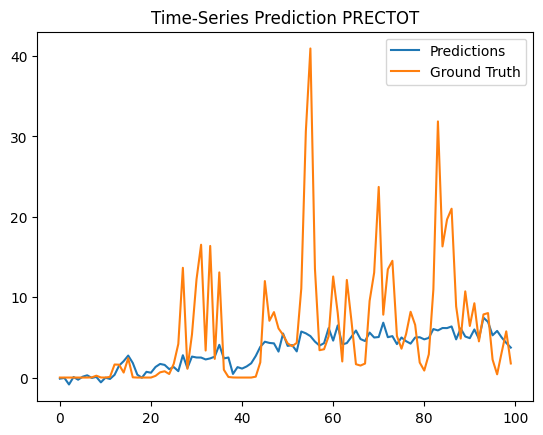

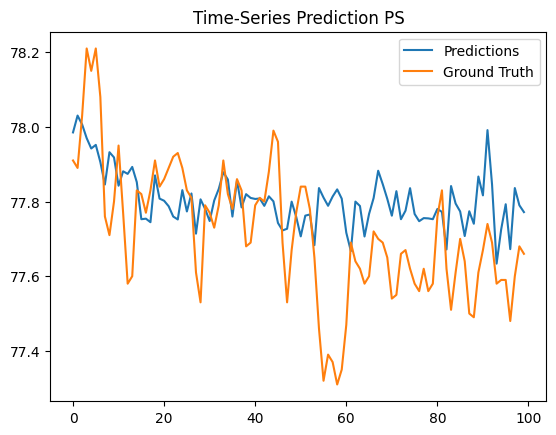

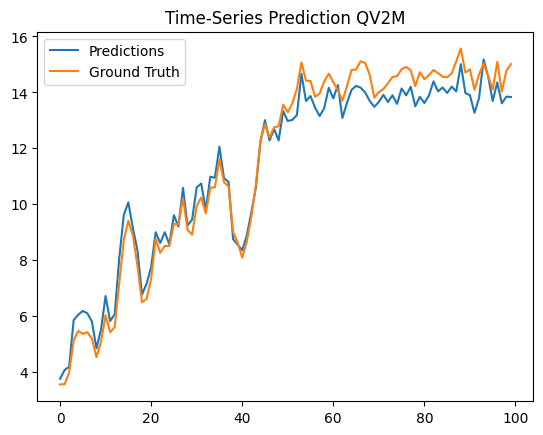

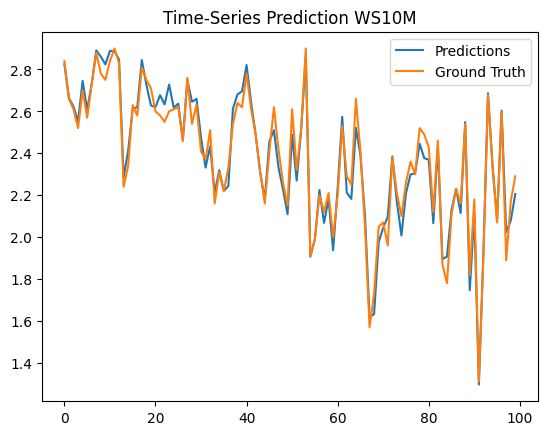

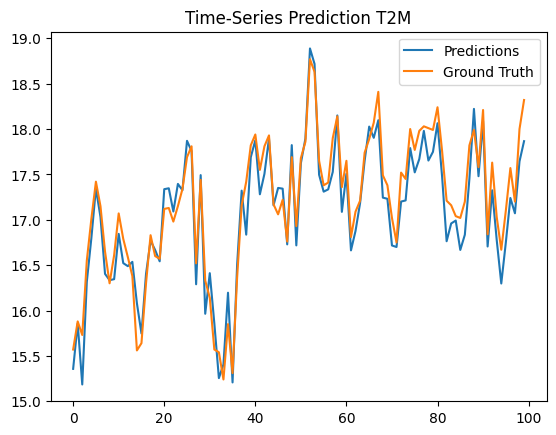

In [38]:

for i in range(0,5):
    plt.plot(y_pred[0:100,i], label='Predictions')
    plt.plot(y_test[0:100,i], label='Ground Truth')
    
    plt.title('Time-Series Prediction '+ y.columns[i])
    plt.legend()
    plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE for each target variable
mae_per_column = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

# Display MAE for each target variable
for i, column in enumerate(selected_columns):
    print(f'MAE for {column}: {mae_per_column[i]}')


MAE for PRECTOT: 2.5558306404267315
MAE for PS: 0.16552261795280218
MAE for QV2M: 0.6625513680999693
MAE for WS10M: 0.04472097950808825
MAE for T2M: 0.17724748346085115
